# Movie Recommender System
Extension: Have created a text input bar to add your movie whose recommendation you want. Output will give you top 4 matches that are recommended movies.


In [20]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets
sns.set_style('white')
%matplotlib inline

In [21]:
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [22]:
#Get the Movie Titles
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [23]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


### Do some Exploratory Data Analysis

In [24]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [25]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [26]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [27]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

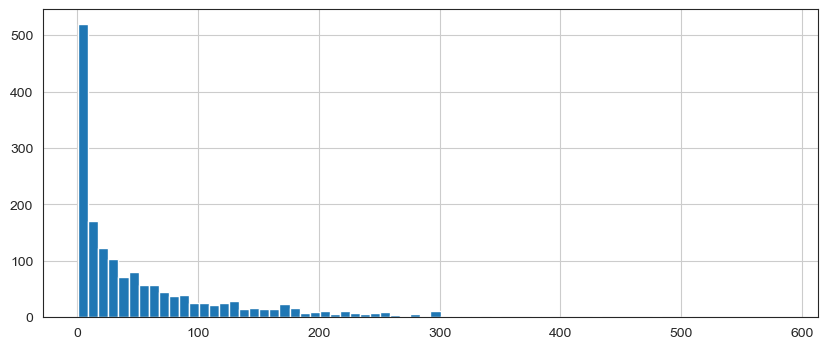

In [28]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<Axes: >

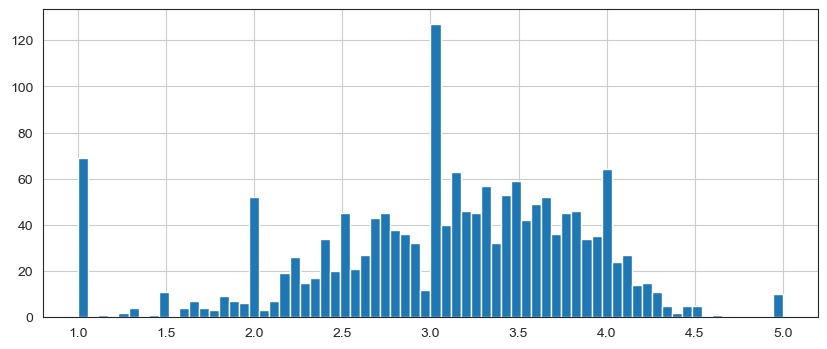

In [29]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

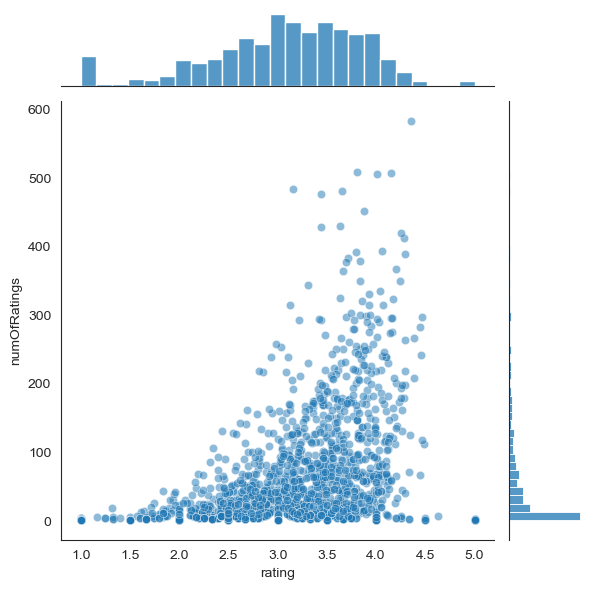

In [30]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

### Create the Recommendation System

Create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [31]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [34]:
# Compute the standard deviation for each movie
stddev = moviemat.std(axis=0)

# Filter out movies with zero standard deviation
moviemat = moviemat.loc[:, stddev != 0]

In [35]:
moviemat = moviemat.fillna(0)  # Replace NaNs with 0

In [39]:
print("Movies in ratings DataFrame:")
print(ratings.index)

print("Movies in moviemat DataFrame:")
print(moviemat.index)

Movies in ratings DataFrame:
Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)
Movies in moviemat DataFrame:
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=944)


In [41]:
print(moviemat.index)
print(moviemat.index.dtype)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=944)
int64


In [42]:
moviemat.index = moviemat.index.astype(str)

In [43]:
moviemat.index = moviemat.index.str.strip().str.lower()

Now we will create a correlation matrix of every movie with every other movie on user ratings. We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained using correlation, their value will be converted to "-".

In [44]:
ratings.index = ratings.index.astype(str).str.strip().str.lower()
moviemat.index = moviemat.index.astype(str).str.strip().str.lower()

In [45]:
missing_titles = [title for title in ratings.index if title not in moviemat.index]
print("Missing titles in moviemat:", missing_titles)

Missing titles in moviemat: ["'til there was you (1997)", '1-900 (1994)', '101 dalmatians (1996)', '12 angry men (1957)', '187 (1997)', '2 days in the valley (1996)', '20,000 leagues under the sea (1954)', '2001: a space odyssey (1968)', '3 ninjas: high noon at mega mountain (1998)', '39 steps, the (1935)', '8 1/2 (1963)', '8 heads in a duffel bag (1997)', '8 seconds (1994)', 'a chef in love (1996)', 'above the rim (1994)', 'absolute power (1997)', 'abyss, the (1989)', 'ace ventura: pet detective (1994)', 'ace ventura: when nature calls (1995)', 'across the sea of time (1995)', 'addams family values (1993)', 'addicted to love (1997)', 'addiction, the (1995)', 'adventures of pinocchio, the (1996)', 'adventures of priscilla, queen of the desert, the (1994)', 'adventures of robin hood, the (1938)', 'affair to remember, an (1957)', 'african queen, the (1951)', 'afterglow (1997)', 'age of innocence, the (1993)', 'aiqing wansui (1994)', 'air bud (1997)', 'air force one (1997)', 'air up there

In [46]:
for i in ratings.index:
    if i not in moviemat.index:
        print(f"Movie '{i}' not found in moviemat. Skipping.")
        continue
    
    movieUserRatings = moviemat.loc[i]
    if movieUserRatings.std() == 0:  # Skip movies with zero variance
        continue
    
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns=['Correlation'])
    corr_toMovie.dropna(inplace=True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending=False).head()
    
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]

Movie ''til there was you (1997)' not found in moviemat. Skipping.
Movie '1-900 (1994)' not found in moviemat. Skipping.
Movie '101 dalmatians (1996)' not found in moviemat. Skipping.
Movie '12 angry men (1957)' not found in moviemat. Skipping.
Movie '187 (1997)' not found in moviemat. Skipping.
Movie '2 days in the valley (1996)' not found in moviemat. Skipping.
Movie '20,000 leagues under the sea (1954)' not found in moviemat. Skipping.
Movie '2001: a space odyssey (1968)' not found in moviemat. Skipping.
Movie '3 ninjas: high noon at mega mountain (1998)' not found in moviemat. Skipping.
Movie '39 steps, the (1935)' not found in moviemat. Skipping.
Movie '8 1/2 (1963)' not found in moviemat. Skipping.
Movie '8 heads in a duffel bag (1997)' not found in moviemat. Skipping.
Movie '8 seconds (1994)' not found in moviemat. Skipping.
Movie 'a chef in love (1996)' not found in moviemat. Skipping.
Movie 'above the rim (1994)' not found in moviemat. Skipping.
Movie 'absolute power (1997)' n

In [47]:
#Check the result 
ratings.head()

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
'til there was you (1997),2.333333,9,"Last of the Mohicans, The (1992)",Happy Gilmore (1996),Pretty Woman (1990),Clueless (1995)
1-900 (1994),2.600000,5,Raging Bull (1980),Ed Wood (1994),Carrie (1976),"Cable Guy, The (1996)"
101 dalmatians (1996),2.908257,109,Twister (1996),Father of the Bride Part II (1995),"Hunchback of Notre Dame, The (1996)",Grumpier Old Men (1995)
12 angry men (1957),4.344000,125,"Bridge on the River Kwai, The (1957)","Graduate, The (1967)",North by Northwest (1959),M*A*S*H (1970)
187 (1997),3.024390,41,Scream 2 (1997),G.I. Jane (1997),Jackie Brown (1997),Rosewood (1997)


In [48]:
ratings = ratings.fillna('-')

In [49]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

# Load the Saved Recommendation Data Generated for Reusability

In [50]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,'til there was you (1997),2.333333,9,"Last of the Mohicans, The (1992)",Happy Gilmore (1996),Pretty Woman (1990),Clueless (1995)
1,1-900 (1994),2.600000,5,Raging Bull (1980),Ed Wood (1994),Carrie (1976),"Cable Guy, The (1996)"
2,101 dalmatians (1996),2.908257,109,Twister (1996),Father of the Bride Part II (1995),"Hunchback of Notre Dame, The (1996)",Grumpier Old Men (1995)
3,12 angry men (1957),4.344000,125,"Bridge on the River Kwai, The (1957)","Graduate, The (1967)",North by Northwest (1959),M*A*S*H (1970)
4,187 (1997),3.024390,41,Scream 2 (1997),G.I. Jane (1997),Jackie Brown (1997),Rosewood (1997)


In [51]:
#Load all the movie names
for i in df_result['title']:
    print(i)

'til there was you (1997)
1-900 (1994)
101 dalmatians (1996)
12 angry men (1957)
187 (1997)
2 days in the valley (1996)
20,000 leagues under the sea (1954)
2001: a space odyssey (1968)
3 ninjas: high noon at mega mountain (1998)
39 steps, the (1935)
8 1/2 (1963)
8 heads in a duffel bag (1997)
8 seconds (1994)
a chef in love (1996)
above the rim (1994)
absolute power (1997)
abyss, the (1989)
ace ventura: pet detective (1994)
ace ventura: when nature calls (1995)
across the sea of time (1995)
addams family values (1993)
addicted to love (1997)
addiction, the (1995)
adventures of pinocchio, the (1996)
adventures of priscilla, queen of the desert, the (1994)
adventures of robin hood, the (1938)
affair to remember, an (1957)
african queen, the (1951)
afterglow (1997)
age of innocence, the (1993)
aiqing wansui (1994)
air bud (1997)
air force one (1997)
air up there, the (1994)
airheads (1994)
akira (1988)
aladdin (1992)
aladdin and the king of thieves (1996)
alaska (1996)
albino alligator (1

In [55]:
import ipywidgets as widgets

# Assuming df_result is your DataFrame with the movie titles and recommendations
inputMovieName = widgets.Text(description="Movie Name:")

def getRecommendations(sender):
    searchMovie = inputMovieName.value.strip().lower()  # Normalize input by stripping and lowering case
    list_result = df_result[df_result['title'].str.strip().str.lower() == searchMovie]  # Normalize DataFrame titles
    
    if list_result.empty:
        print(f"No recommendations found for '{inputMovieName.value}'. Please check the movie title and try again.")
    else:
        fm = list_result['FirstMovieRecommendation'].values[0]
        sm = list_result['SecondMovieRecommendation'].values[0]
        tm = list_result['ThirdMovieRecommendation'].values[0]
        fourthm = list_result['FourthMovieRecommendation'].values[0]
        finalRecommendationText = f'1: {fm}\n2: {sm}\n3: {tm}\n4: {fourthm}'
        print(f"Your Recommendations for the Movie '{inputMovieName.value}' are:\n")
        print(finalRecommendationText)

No recommendations found for 'Forrest gump'. Please check the movie title and try again.
No recommendations found for '12 angry men'. Please check the movie title and try again.
Your Recommendations for the Movie '187 (1997)' are:

1: Scream 2 (1997)
2: G.I. Jane (1997)
3: Jackie Brown (1997)
4: Rosewood (1997)
Your Recommendations for the Movie 'dolores claiborne (1994)' are:

1: Seven Years in Tibet (1997)
2: Harold and Maude (1971)
3: Emma (1996)
4: Bound (1996)


### How to get Recommendations?
- Select and Copy any movie from the list of Movie Names above
- Add that to the text box below
##### You will have your Movie Recommendation for that Particular movie :)

Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.

In [56]:
# Register the event to call getRecommendations on form submit
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='', description='Movie Name:')